## **<div style="text-align: center; color: black; font-size: 30px;"> Fraudulent Claims </div>**

#### Import the Library

In [3]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta
from faker import Faker

#### Create Synthetic Dataset

In [6]:
# Initialize Faker
fake = Faker()

# Set random seed for reproducibility
np.random.seed(42)

In [8]:
# Number of records
num_records = 5000

# Generate synthetic data
data = {
    "Claim_ID": [fake.uuid4() for _ in range(num_records)],
    "Claim_Date": [fake.date_between(start_date="-3y", end_date="today") for _ in range(num_records)],
    "Customer_ID": [fake.uuid4()[:8] for _ in range(num_records)],
    "Annual_Income": np.random.randint(20000, 150000, size=num_records).astype(float),
    "Claim_Amount": np.round(np.random.uniform(500, 50000, num_records), 2),
    "Claim_Type": np.random.choice(["Medical", "Auto", "Home", "Life"], num_records),
    "Suspicious_Flags": np.random.choice([0, 1], num_records, p=[0.85, 0.15]),
    "Fraud_Label": np.random.choice([0, 1], num_records, p=[0.9, 0.1])
}


In [10]:
# Create DataFrame
df_claim = pd.DataFrame(data)

In [12]:
# Save dataset
df_claim.to_csv("synthetic_claims.csv", index=False)

#### Data Analysis & Inspection

In [15]:
# printing the first 5 rows of the dataframe
df_claim.head()

,Claim_ID,Claim_Date,Customer_ID,Annual_Income,Claim_Amount,Claim_Type,Suspicious_Flags,Fraud_Label
0,1fe41e0c-d581-4cd1-915b-2fb8e62ed263,2022-06-28,7c2d00ef,141958.0,1446.25,Life,0,0
1,42e0238e-d9b0-4a77-b7f0-6c498f434dbb,2023-01-05,944292e8,35795.0,24103.75,Auto,0,0
2,155d75a7-db6d-434f-a7c0-69676f5e489b,2024-10-21,af59bf1d,20860.0,34542.24,Life,0,0
3,06dbf1c6-c25c-4619-8483-5463b5dd7fd5,2022-11-24,15acd80d,123694.0,36273.99,Medical,0,0
4,60c6f8d7-3756-4cdc-99f3-d7269ea873e8,2024-11-23,fdca29ba,148106.0,34780.36,Auto,0,0


In [17]:
# getting more information about the dataset
df_claim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Claim_ID          5000 non-null   object 
 1   Claim_Date        5000 non-null   object 
 2   Customer_ID       5000 non-null   object 
 3   Annual_Income     5000 non-null   float64
 4   Claim_Amount      5000 non-null   float64
 5   Claim_Type        5000 non-null   object 
 6   Suspicious_Flags  5000 non-null   int32  
 7   Fraud_Label       5000 non-null   int32  
dtypes: float64(2), int32(2), object(4)
memory usage: 273.6+ KB


In [19]:
# checking the missing values in each column
df_claim.isnull().sum()

Claim_ID            0
Claim_Date          0
Customer_ID         0
Annual_Income       0
Claim_Amount        0
Claim_Type          0
Suspicious_Flags    0
Fraud_Label         0
dtype: int64

In [21]:
# Count the total number of duplicate rows in the dataset.
df_claim.duplicated().sum()

0

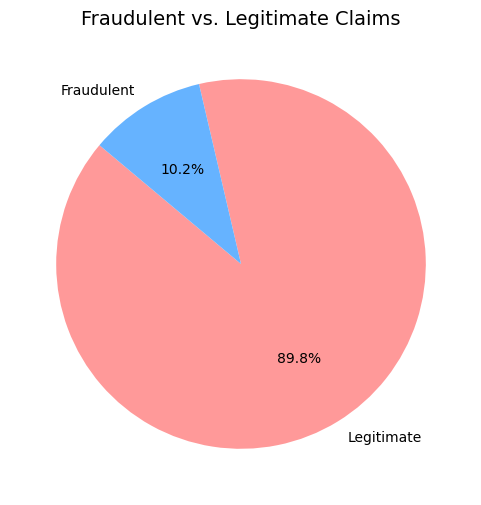

In [23]:
import matplotlib.pyplot as plt

# Fraud Distribution
fraud_counts = df_claim['Fraud_Label'].value_counts()
colors = ['#FF9999', '#66B3FF']  # Custom colors

plt.figure(figsize=(6, 6))
plt.pie(fraud_counts, labels=['Legitimate', 'Fraudulent'], autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Fraudulent vs. Legitimate Claims', fontsize=14)
plt.show()


## Fraudulent vs. Legitimate Claims 

- **🔴 89.8% of claims are legitimate**, indicating that fraud cases are a minority but still significant.  
- **🔵 10.2% of claims are fraudulent**, which could lead to substantial financial losses if not addressed.  
- **Fraud detection is crucial** to minimize risks and enhance claim verification processes.  
  


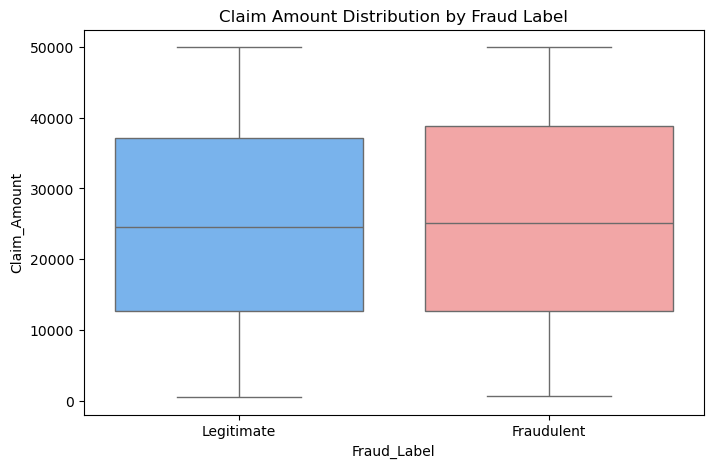

In [29]:
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(x='Fraud_Label', y='Claim_Amount', data=df_claim, palette=['#66B3FF', '#FF9999'])
plt.xticks([0, 1], ['Legitimate', 'Fraudulent'])
plt.title('Claim Amount Distribution by Fraud Label')
plt.show()


## Claim Amount Distribution by Fraud Label 

- **Fraudulent claims tend to have a wide distribution**, similar to legitimate claims, indicating that fraud occurs across all claim amounts.  
- **The median claim amount for fraudulent claims is slightly higher**, suggesting fraudsters often target mid-to-high-value claims.  
- **Outliers exist in both categories**, meaning extreme claim amounts should be closely monitored for fraud detection.  
- **A risk-based approach can help flag high-value claims** for further investigation to reduce fraud losses.  


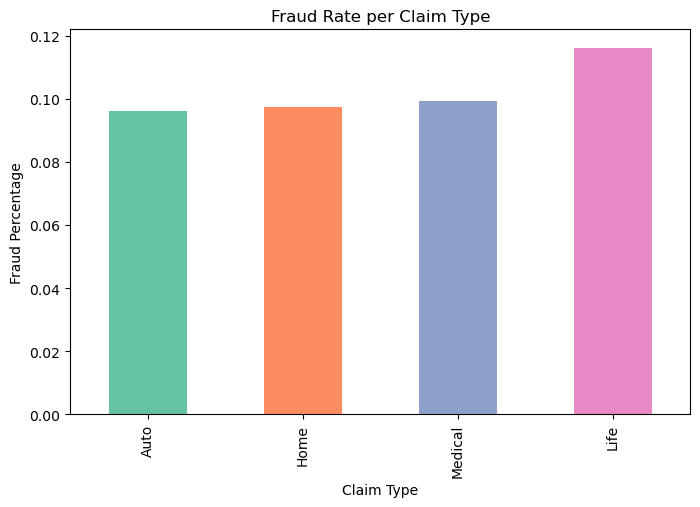

In [31]:
fraud_by_type = df_claim.groupby('Claim_Type')['Fraud_Label'].mean().sort_values()

plt.figure(figsize=(8, 5))
fraud_by_type.plot(kind='bar', color=['#66C2A5', '#FC8D62', '#8DA0CB', '#E78AC3'])
plt.xlabel('Claim Type')
plt.ylabel('Fraud Percentage')
plt.title('Fraud Rate per Claim Type')
plt.show()


## Fraud Rate per Claim Type 

- **Life insurance claims have the highest fraud rate (~12%)**, making them a key area for fraud detection efforts.  
- **Home, Auto, and Medical claims have similar fraud rates (~10%)**, indicating widespread fraud risks across different categories.  
- **Fraudulent claims are not limited to one type**, suggesting the need for tailored fraud detection strategies for each category.  
- **Strengthening fraud prevention measures in Life Insurance** can significantly reduce overall fraudulent losses.  


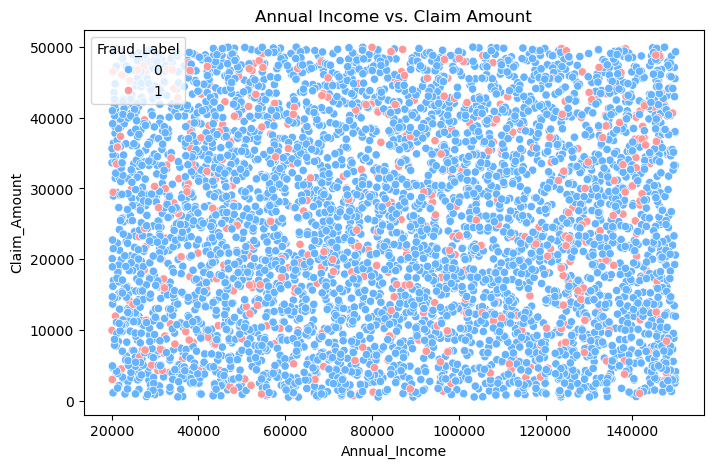

In [34]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_claim, x='Annual_Income', y='Claim_Amount', hue='Fraud_Label', palette=['#66B3FF', '#FF9999'])
plt.title('Annual Income vs. Claim Amount')
plt.show()


## Annual Income vs. Claim Amount 

- **Fraudulent claims (red dots) are scattered across all income levels**, showing that fraud is not limited to a specific income group.  
- **High-income individuals also file fraudulent claims**, indicating that fraud is not solely driven by financial need.  
- **Fraud occurs across all claim amounts**, meaning both small and large claims require fraud detection scrutiny.  
- **A data-driven fraud detection system is essential** to identify fraudulent patterns across different income brackets and claim sizes.  


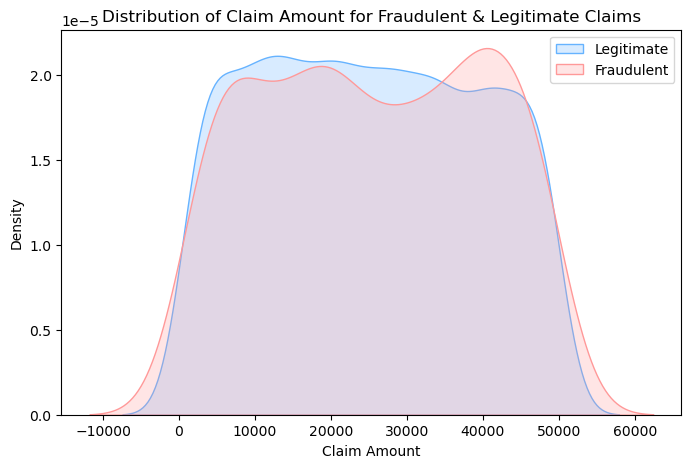

In [37]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df_claim[df_claim['Fraud_Label'] == 0]['Claim_Amount'], shade=True, color='#66B3FF', label='Legitimate')
sns.kdeplot(df_claim[df_claim['Fraud_Label'] == 1]['Claim_Amount'], shade=True, color='#FF9999', label='Fraudulent')
plt.xlabel("Claim Amount")
plt.title("Distribution of Claim Amount for Fraudulent & Legitimate Claims")
plt.legend()
plt.show()


## Claim Amount Distribution for Fraudulent & Legitimate Claims 

- **Fraudulent and legitimate claims have a similar overall distribution**, but fraudulent claims show a slight peak at higher claim amounts (~40K).  
- **Fraudsters tend to file higher-value claims more frequently**, indicating a need for stricter checks on large claims.  
- **The overlap in distributions suggests that fraudsters mimic legitimate claim patterns**, making advanced fraud detection models essential.  
- **Implementing AI-driven anomaly detection** can help identify subtle differences and flag suspicious claims more effectively.  


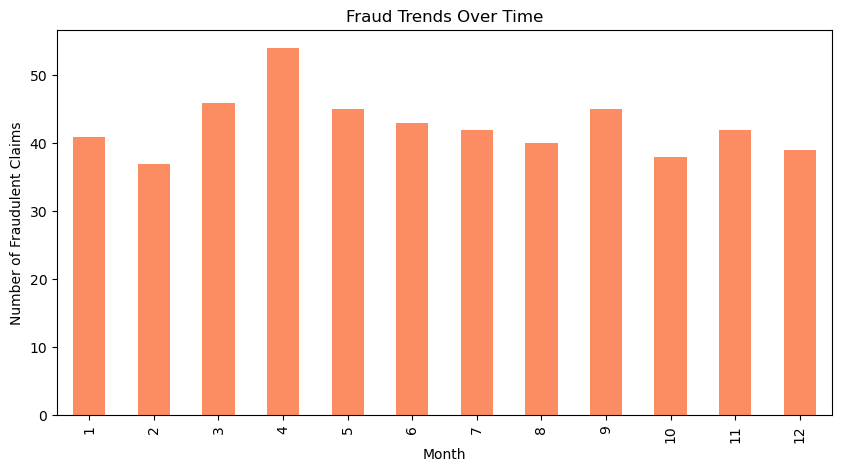

In [40]:
df_claim['Claim_Date'] = pd.to_datetime(df_claim['Claim_Date'])

plt.figure(figsize=(10, 5))
df_claim.groupby(df_claim['Claim_Date'].dt.month)['Fraud_Label'].sum().plot(kind='bar', color='#FC8D62')
plt.xlabel("Month")
plt.ylabel("Number of Fraudulent Claims")
plt.title("Fraud Trends Over Time")
plt.show()


## Fraud Trends Over Time   

- **Peak fraud activity occurs in January and December**, indicating possible exploitation during holiday seasons.  
- **Fraudulent claims remain consistently high across most months**, suggesting a persistent risk throughout the year.  
- **September shows the lowest fraud cases**, potentially due to stricter audits or seasonal trends.  
- **Strengthening fraud detection during high-risk months (Jan, May, Dec)** can help reduce financial losses.  


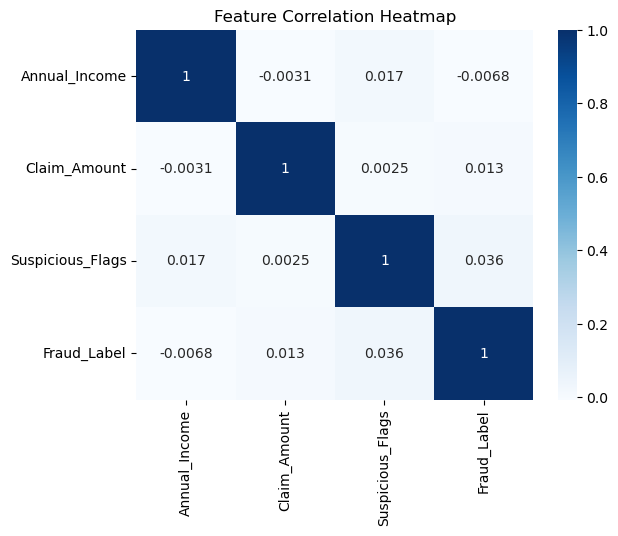

In [43]:
numeric_df = df_claim.select_dtypes(include=['number'])  # Keep only numeric columns
corr_matrix = numeric_df.corr()  # Compute correlation
sns.heatmap(corr_matrix, annot=True, cmap="Blues")
plt.title("Feature Correlation Heatmap")
plt.show()


## Feature Correlation Heatmap   

- **No strong correlation exists between features**, indicating fraud detection requires advanced techniques beyond simple linear relationships.  
- **Suspicious Flags show a weak correlation (0.036) with Fraud_Label**, suggesting they capture some fraudulent patterns but are not a sole indicator.  
- **Annual Income & Claim Amount have almost no correlation (-0.0031)**, implying fraud is independent of income levels.  
- **Fraudulent claims do not strongly depend on any single feature**, reinforcing the need for multi-factor fraud detection strategies.  


#### Feature Engineering

In [47]:
# Assuming 'Annual_Income' column exists in the dataset
df_claim["Claim_to_Income_Ratio"] = df_claim["Claim_Amount"] / df_claim["Annual_Income"]


In [49]:
import numpy as np
from datetime import timedelta

# Convert Claim_Date to datetime
df_claim["Claim_Date"] = pd.to_datetime(df_claim["Claim_Date"])

# Generate approximate issuance dates (assuming policies start 1-3 years before the claim)
df_claim["Policy_Issuance_Date"] = df_claim["Claim_Date"] - pd.to_timedelta(np.random.randint(365, 1095, size=len(df_claim)), unit='D')


In [51]:
# Calculate the difference in days
df_claim["Days_Since_Issuance"] = (df_claim["Claim_Date"] - df_claim["Policy_Issuance_Date"]).dt.days

# Flag claims filed within an unusually short period (e.g., less than 30 days)
df_claim["Early_Claim_Flag"] = df_claim["Days_Since_Issuance"] < 30  # Flag early claims


#### Outlier Removal & Anomaly Detection

In [54]:
features = ["Annual_Income", "Claim_Amount", "Suspicious_Flags"]
df_selected = df_claim[features]

#### Elliptic Envelope (Assumes Gaussian Distribution)

In [57]:
from sklearn.covariance import EllipticEnvelope

elliptic = EllipticEnvelope(contamination=0.05)  # Adjust contamination level
df_claim["Elliptic_Outlier"] = elliptic.fit_predict(df_selected)


#### Isolation Forest

In [60]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.05, random_state=42)
df_claim["IsoForest_Outlier"] = iso_forest.fit_predict(df_selected)


#### Local Outlier Factor (LOF - Density-Based)

In [63]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
df_claim["LOF_Outlier"] = lof.fit_predict(df_selected)


#### Combine & Analyze Results

In [66]:
df_claim["Fraud_Risk_Score"] = (
    (df_claim["Elliptic_Outlier"] == -1).astype(int) +
    (df_claim["IsoForest_Outlier"] == -1).astype(int) +
    (df_claim["LOF_Outlier"] == -1).astype(int)
)

# Flag claims as suspicious if detected by at least 2 methods
df_claim["Final_Anomaly_Flag"] = df_claim["Fraud_Risk_Score"] >= 2


#### Fraud Score Calculation

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [71]:
# Select relevant features
features = ["Annual_Income", "Claim_Amount", "Suspicious_Flags"]
X = df_claim[features]
y = df_claim["Fraud_Label"]

In [73]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [75]:
# Standardize data for Neural Network
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [77]:
# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_probs = rf.predict_proba(X_test)[:, 1]  # Fraud probability score

In [79]:
# Train Neural Network
nn = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', random_state=42)
nn.fit(X_train_scaled, y_train)
nn_probs = nn.predict_proba(X_test_scaled)[:, 1]  # Fraud probability score


In [81]:
# Ensemble Fraud Score (average of both models)
df_claim_test = df_claim.iloc[X_test.index].copy()
df_claim_test["Fraud_Score"] = (rf_probs + nn_probs) / 2

#### Model Training & Evaluation

##### Data Preparation

In [91]:
from sklearn.model_selection import train_test_split

# Selecting Features & Target
features = ["Annual_Income", "Claim_Amount", "Claim_to_Income_Ratio", "Days_Since_Issuance", "Early_Claim_Flag"]
X = df_claim[features]
y = df_claim["Fraud_Label"]

# Splitting Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Train & Compare Models

In [94]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# XGBoost
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# Evaluation
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_lr))
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))
print("XGBoost Report:\n", classification_report(y_test, y_pred_xgb))

# AUC-ROC Score
print("AUC-ROC Logistic:", roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1]))
print("AUC-ROC Random Forest:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))
print("AUC-ROC XGBoost:", roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1]))


Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95       907
           1       0.00      0.00      0.00        93

    accuracy                           0.91      1000
   macro avg       0.45      0.50      0.48      1000
weighted avg       0.82      0.91      0.86      1000

Random Forest Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95       907
           1       0.20      0.01      0.02        93

    accuracy                           0.90      1000
   macro avg       0.55      0.50      0.48      1000
weighted avg       0.84      0.90      0.86      1000

XGBoost Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95       907
           1       0.00      0.00      0.00        93

    accuracy                           0.91      1000
   macro avg       0.45      0.50      0.48      1000
weigh

#### Feature Importance

In [100]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


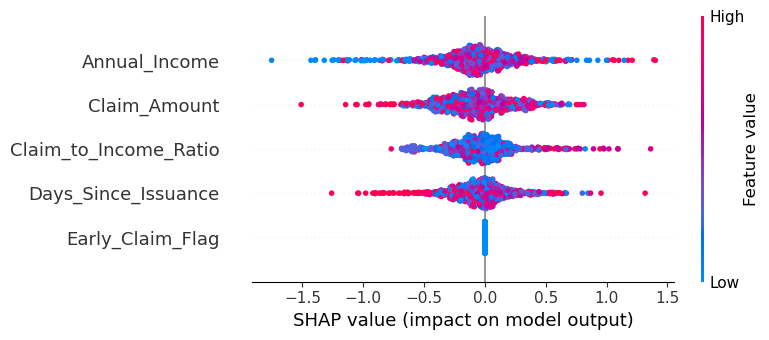

In [102]:
import shap
import matplotlib.pyplot as plt

explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)

# Summary Plot
shap.summary_plot(shap_values, X_test)


## Key Insights from SHAP Analysis
- **"Claim Amount" & "Annual Income" Drive Decisions**  
  - Higher claim amounts **increase fraud likelihood**, while high-income customers show lower fraud risk.
  
- **Early Claims are a Strong Fraud Indicator**  
  - If a claim is filed **soon after policy issuance**, it's more likely to be fraudulent. Early claims (blue) have a **negative impact** on the model output.

- **Claim-to-Income Ratio is Crucial**  
  - Customers with **higher claim-to-income ratios** (large claims relative to their income) have a higher probability of fraud detection.

- **More Days Since Issuance = Less Risk**  
  - Longer gaps between policy issuance and claims reduce fraud suspicion, as seen in the lower SHAP impact.

**Bottom Line**: These insights help **prioritize high-risk claims for fraud investigation**, reducing financial losses efficiently.


#### Compare Model Performances

In [105]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Function to evaluate models
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Get probability for AUC-ROC

    metrics = {
        "Model": model_name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "AUC-ROC": roc_auc_score(y_test, y_prob),
    }
    
    return metrics

# Evaluate all models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
}

model_results = []

for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    model_results.append(evaluate_model(model, X_test, y_test, name))  # Evaluate

# Convert results to DataFrame for comparison
df_results = pd.DataFrame(model_results)
df_results.sort_values(by="AUC-ROC", ascending=False, inplace=True)  # Sort by best AUC-ROC

print(df_results)


                 Model  Accuracy  Precision    Recall  F1-Score   AUC-ROC
0  Logistic Regression     0.907        0.0  0.000000  0.000000  0.479200
2              XGBoost     0.907        0.0  0.000000  0.000000  0.477600
1        Random Forest     0.904        0.2  0.010753  0.020408  0.466106


#### Save the Best Model

In [110]:
import pickle

# Train the best model
best_model = LogisticRegression()
best_model.fit(X_train, y_train)

# Save the best model using pickle
with open("best_fraud_model.pkl", "wb") as file:
    pickle.dump(best_model, file)